# 라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import requests
import pandas as pd
import geopandas as gpd
df = pd.read_csv('Library.csv')
df

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,고유번호,구명,법정동명,산지여부,주지번,부지번,새주소명,시설명,운영기관,설립주체,시설구분,개관일,면적,홈페이지주소,연락처,생성일,경도,위도
0,21,구로구,구로3동,1,777,1,구로구 디지털로 27다길 65 2층,꿈마을 도서관,구로구 시설관리공단,,구립도서관,2007-04-05,476.0,lib.guro.go.kr/dreamtown/,830-5807,,126.890115,37.487220
1,22,용산구,후암동,1,30,84,용산구 후암동 30-84,남산 도서관,,,교육청도서관,1922-10-05,0.0,lib.sen.go.kr/lib_index.jsp,,,126.981375,37.552664
2,23,중구,신당동,1,844,,중구 다산로 32,남산타운 문화체육센터 어린이도서관,시설관리공단,,구립도서관,2010-04-01,273.8,www.e-junggulib.or.kr,02-2280-8520,,127.009297,37.549020
3,24,노원구,상계10동,1,686,,노원구 온곡길 21,노원 정보도서관,노원 교육복지재단,,구립도서관,2006-02-15,6526.0,www.nowonlib.kr,02-950-0029,,127.064177,37.660927
4,25,노원구,중계3동,1,508,,노원구 중계3동 508,노원 평생학습관,,,교육청도서관,1990-05-08,0.0,lib.sen.go.kr/lib_index.jsp,,,127.067120,37.640120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,광진구,중곡동,1,168,8,광진구 능동로 16,중곡 문화체육센터 도서관,광진구 시설관리공단,,구립도서관,2008-10-27,1320.0,gwangjinlib.seoul.kr,3408-4900,,127.084751,37.567803
119,119,중구,신당동,1,52,164,중구 다산로38길 66-35,중구 구립 신당 도서관,시설관리공단,,구립도서관,2011-03-24,1557.4,www.e-junggulib.or.kr,02-2280-9240,,127.018969,37.561726
120,121,강남구,대치4동,1,928,22,강남구 도곡로 북49길 23,즐거운 도서관,(사)작은도서관 만드는 사람들,,구립도서관,2004-09-01,325.0,library.gangnam.go.kr,02-565-7533,,127.057872,37.499750
121,122,은평구,증산동,1,173,8,은평구 증산로5길 6,증산 정보도서관,사회복지법인 인덕원,,구립도서관,2008-10-09,2110.0,www.jsplib.or.kr,02-307-6030,,126.907643,37.582804


In [2]:
#기존 데이터셋에 경도와 위도 컬럼이 존재함. 주소 정보를 좌표로 변환하는 실험을 진행하기위해 경도와 위도 컬럼 제거
df=df.drop(columns=['경도','위도'])
df

,고유번호,구명,법정동명,산지여부,주지번,부지번,새주소명,시설명,운영기관,설립주체,시설구분,개관일,면적,홈페이지주소,연락처,생성일
0,21,구로구,구로3동,1,777,1,구로구 디지털로 27다길 65 2층,꿈마을 도서관,구로구 시설관리공단,,구립도서관,2007-04-05,476.0,lib.guro.go.kr/dreamtown/,830-5807,
1,22,용산구,후암동,1,30,84,용산구 후암동 30-84,남산 도서관,,,교육청도서관,1922-10-05,0.0,lib.sen.go.kr/lib_index.jsp,,
2,23,중구,신당동,1,844,,중구 다산로 32,남산타운 문화체육센터 어린이도서관,시설관리공단,,구립도서관,2010-04-01,273.8,www.e-junggulib.or.kr,02-2280-8520,
3,24,노원구,상계10동,1,686,,노원구 온곡길 21,노원 정보도서관,노원 교육복지재단,,구립도서관,2006-02-15,6526.0,www.nowonlib.kr,02-950-0029,
4,25,노원구,중계3동,1,508,,노원구 중계3동 508,노원 평생학습관,,,교육청도서관,1990-05-08,0.0,lib.sen.go.kr/lib_index.jsp,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,광진구,중곡동,1,168,8,광진구 능동로 16,중곡 문화체육센터 도서관,광진구 시설관리공단,,구립도서관,2008-10-27,1320.0,gwangjinlib.seoul.kr,3408-4900,
119,119,중구,신당동,1,52,164,중구 다산로38길 66-35,중구 구립 신당 도서관,시설관리공단,,구립도서관,2011-03-24,1557.4,www.e-junggulib.or.kr,02-2280-9240,
120,121,강남구,대치4동,1,928,22,강남구 도곡로 북49길 23,즐거운 도서관,(사)작은도서관 만드는 사람들,,구립도서관,2004-09-01,325.0,library.gangnam.go.kr,02-565-7533,
121,122,은평구,증산동,1,173,8,은평구 증산로5길 6,증산 정보도서관,사회복지법인 인덕원,,구립도서관,2008-10-09,2110.0,www.jsplib.or.kr,02-307-6030,


In [3]:
df['시설구분'].value_counts()

시설구분
구립도서관     83
교육청도서관    21
장애인도서관     9
사립도서관      7
국립도서관      3
Name: count, dtype: int64

# API_KEY 저장
출처 : https://developers.kakao.com/console/app/1029244  (kakao developers 홈페이지 -> 내 애플리케이션 -> 애플리케이션 추가하기 -> 상세정보 입력 후 'REST API 키' 복사 후 저장

In [4]:
API_KEY='0ec8a1a3892af03456cc4879fe1e7142'

# 주소 -> 좌표 변환 함수 코드

In [5]:
def convert_address_to_coordinates(address):
    api_url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {API_KEY}"}

    params = {"query": address}
    
    try:
        response = requests.get(api_url, headers=headers, params=params)
        response.raise_for_status()
        result = response.json()

        if "documents" in result and len(result["documents"]) > 0:
            coordinates = result["documents"][0]["y"], result["documents"][0]["x"]
            return coordinates
        else:
            return None
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

In [6]:
# 데이터프레임에 좌표 추가
def add_coordinates_to_dataframe(df, address_column):
    latitudes = []
    longitudes = []

    for address in df[address_column]:
        coordinates = convert_address_to_coordinates(address)
        if coordinates:
            latitudes.append(coordinates[0])
            longitudes.append(coordinates[1])
        else:
            latitudes.append(None)
            longitudes.append(None)

    df["위도"] = latitudes
    df["경도"] = longitudes

In [7]:
# 주소를 좌표로 변환하여 데이터프레임에 추가
add_coordinates_to_dataframe(df, '새주소명')
df.to_csv('location_xy.csv', index=False, encoding='utf-8')
df

#다시 위도와 경도가 생성된 것을 확인할 수 있음 



,고유번호,구명,법정동명,산지여부,주지번,부지번,새주소명,시설명,운영기관,설립주체,시설구분,개관일,면적,홈페이지주소,연락처,생성일,위도,경도
0,21,구로구,구로3동,1,777,1,구로구 디지털로 27다길 65 2층,꿈마을 도서관,구로구 시설관리공단,,구립도서관,2007-04-05,476.0,lib.guro.go.kr/dreamtown/,830-5807,,37.4871431613036,126.890154656237
1,22,용산구,후암동,1,30,84,용산구 후암동 30-84,남산 도서관,,,교육청도서관,1922-10-05,0.0,lib.sen.go.kr/lib_index.jsp,,,37.5527324010142,126.98112766905
2,23,중구,신당동,1,844,,중구 다산로 32,남산타운 문화체육센터 어린이도서관,시설관리공단,,구립도서관,2010-04-01,273.8,www.e-junggulib.or.kr,02-2280-8520,,37.5471505540187,127.005706247221
3,24,노원구,상계10동,1,686,,노원구 온곡길 21,노원 정보도서관,노원 교육복지재단,,구립도서관,2006-02-15,6526.0,www.nowonlib.kr,02-950-0029,,None,None
4,25,노원구,중계3동,1,508,,노원구 중계3동 508,노원 평생학습관,,,교육청도서관,1990-05-08,0.0,lib.sen.go.kr/lib_index.jsp,,,37.6401157599256,127.067111861997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,118,광진구,중곡동,1,168,8,광진구 능동로 16,중곡 문화체육센터 도서관,광진구 시설관리공단,,구립도서관,2008-10-27,1320.0,gwangjinlib.seoul.kr,3408-4900,,None,None
119,119,중구,신당동,1,52,164,중구 다산로38길 66-35,중구 구립 신당 도서관,시설관리공단,,구립도서관,2011-03-24,1557.4,www.e-junggulib.or.kr,02-2280-9240,,37.5617225433977,127.018930284366
120,121,강남구,대치4동,1,928,22,강남구 도곡로 북49길 23,즐거운 도서관,(사)작은도서관 만드는 사람들,,구립도서관,2004-09-01,325.0,library.gangnam.go.kr,02-565-7533,,None,None
121,122,은평구,증산동,1,173,8,은평구 증산로5길 6,증산 정보도서관,사회복지법인 인덕원,,구립도서관,2008-10-09,2110.0,www.jsplib.or.kr,02-307-6030,,37.5828094398328,126.907671330325


In [8]:
df[df['위도'].isna()]  #경도와 위도 결측치 동일

,고유번호,구명,법정동명,산지여부,주지번,부지번,새주소명,시설명,운영기관,설립주체,시설구분,개관일,면적,홈페이지주소,연락처,생성일,위도,경도
3,24,노원구,상계10동,1,686,,노원구 온곡길 21,노원 정보도서관,노원 교육복지재단,,구립도서관,2006-02-15,6526.00,www.nowonlib.kr,02-950-0029,,None,None
6,27,강남구,논현동,1,114,24,강남구 학동로북32길 17 6층,논현 도서관,(사)작은도서관 만드는 사람들,,구립도서관,1997-09-10,450.00,library.gangnam.go.kr,02-3443-7650,,None,None
7,28,강남구,논현동,1,58,13,강남구 학동로 169-1,논현 정보도서관,(사)작은도서관 만드는 사람들,,구립도서관,2003-07-09,707.00,library.gangnam.go.kr,02-515-1178,,None,None
11,32,도봉구,창동,1,808,1,도봉구 자운길 51,도봉 어린이문화정보센터,도봉문화원,,구립도서관,2008-04-17,1446.00,http:www.kidlib.dobong.kr,02-995-4171,,None,None
15,36,동작구,상도1동,1,514,,동작구 매봉로 37,동작 상도국주도서관,동작구 도시시설관리공단,,구립도서관,2009-10-29,525.00,lib.dongjak.go.kr/,02-813-6750,,None,None
19,40,강동구,명일동,1,341,2,강동구 명일동 341-23,명성교회 도서관,명성교회,,사립도서관,2005-10-19,321.00,www.mslib.or.kr/,,,None,None
20,41,양천구,목동,1,909,3,양천구 목동동로 407-2,목마 작은도서관,양천구 (목5동 주민센터),,구립도서관,2009-07-20,461.00,lib.yangcheon.go.kr/,2652-8910,,None,None
21,42,은평구,진관동,1,15,19,은평구 진관동 은평뉴타운 상림마을 15-19,상림마을 작은도서관,사회복지법인 인덕원,,구립도서관,2009-09-23,311.00,www.eplib.or.kr/action/small_lib/intro.php,383-7557~8,,None,None
23,44,서대문구,현저동,1,101,,서대문구 현저동 성산로 695-80,서대문구립 이진아 기념도서관,서대문구 도시관리공단,,구립도서관,2005-09-15,2756.00,www.sdmljalib.or.kr,02)360-8615,,None,None
30,51,송파구,잠실3동,1,44,4,송파구 석촌호수길 155,소나무언덕 2호 작은도서관,한국 지역사회교육 협의회,,구립도서관,2009-02-26,330.00,www.spclib.or.kr,02-424-0780,,None,None


위도와 경도 컬럼이 생성됐지만 자세히 살펴보면 'None' 값이 존재함.
주소->좌표로 변환하는 과정에서 몇개의 데이터는 변환되지 못했음.

이를 해결하기 위해 직접 좌표 값을 추가했음.

좌표 값 구하는 사이트 : https://coordinates-gps.gosur.com/ko/?ll=37.51392502101423,127.03025971691136&z=19.295379586691595&t=streets 

In [9]:
df.loc[3,'위도']=37.6611
df.loc[3,'경도']=127.0651

df.loc[6,'위도']=37.5139
df.loc[6,'경도']=127.0302

df.loc[7,'위도']=37.513883
df.loc[7,'경도']=127.029322

df.loc[11,'위도']=37.659060
df.loc[11,'경도']=127.049525

df.loc[15,'위도']=37.506831
df.loc[15,'경도']=126.951015

df.loc[19,'위도']=37.546910
df.loc[19,'경도']=127.146286

df.loc[20,'위도']=37.538050
df.loc[20,'경도']=126.884548

df.loc[21,'위도']=37.644185
df.loc[21,'경도']=126.928864

df.loc[23,'위도']=37.574219
df.loc[23,'경도']=126.956186

df.loc[30,'위도']=37.507261
df.loc[30,'경도']=127.094242

df.loc[33,'위도']=37.620465
df.loc[33,'경도']=127.012453

df.loc[34,'위도']=37.618329
df.loc[34,'경도']=127.029996

df.loc[36,'위도']=37.630097
df.loc[36,'경도']=127.017597

df.loc[38,'위도']=37.522396
df.loc[38,'경도']=127.102999

df.loc[43,'위도']=37.493556
df.loc[43,'경도']=127.146866

df.loc[53,'위도']=37.534108
df.loc[53,'경도']=127.066276

df.loc[54,'위도']=37.580782
df.loc[54,'경도']=126.983060

df.loc[70,'위도']=37.621591
df.loc[70,'경도']=127.083076

df.loc[76,'위도']=37.623021
df.loc[76,'경도']=127.021674

df.loc[86,'위도']=37.525981
df.loc[86,'경도']=126.856649

df.loc[90,'위도']=37.551086
df.loc[90,'경도']=127.110623

df.loc[105,'위도']=37.563220
df.loc[105,'경도']=127.036764

df.loc[107,'위도']=37.599922
df.loc[107,'경도']=127.013919

df.loc[118,'위도']=37.567803
df.loc[118,'경도']=127.084751

df.loc[120,'위도']=37.499750
df.loc[120,'경도']=127.057872

df.loc[122,'위도']=37.525094
df.loc[122,'경도']=127.049339

In [10]:
df[df['위도']=='None'] #결측치 채우기 완료

,고유번호,구명,법정동명,산지여부,주지번,부지번,새주소명,시설명,운영기관,설립주체,시설구분,개관일,면적,홈페이지주소,연락처,생성일,위도,경도


In [11]:
#데이터 타입을 확인해보면 위도와 경도가 object 형태인 것을 확인할 수 있음. 따라서, 타입을 'float'형태로 변환해야함
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고유번호    123 non-null    int64  
 1   구명      123 non-null    object 
 2   법정동명    123 non-null    object 
 3   산지여부    123 non-null    int64  
 4   주지번     123 non-null    int64  
 5   부지번     123 non-null    object 
 6   새주소명    123 non-null    object 
 7   시설명     123 non-null    object 
 8   운영기관    123 non-null    object 
 9   설립주체    123 non-null    object 
 10  시설구분    123 non-null    object 
 11  개관일     123 non-null    object 
 12  면적      123 non-null    float64
 13  홈페이지주소  123 non-null    object 
 14  연락처     123 non-null    object 
 15  생성일     123 non-null    object 
 16  위도      123 non-null    object 
 17  경도      123 non-null    object 
dtypes: float64(1), int64(3), object(14)
memory usage: 17.4+ KB


In [15]:
df['경도']=df['경도'].astype('float')
df['위도']=df['위도'].astype('float')
df.info() #float으로 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고유번호    123 non-null    int64  
 1   구명      123 non-null    object 
 2   법정동명    123 non-null    object 
 3   산지여부    123 non-null    int64  
 4   주지번     123 non-null    int64  
 5   부지번     123 non-null    object 
 6   새주소명    123 non-null    object 
 7   시설명     123 non-null    object 
 8   운영기관    123 non-null    object 
 9   설립주체    123 non-null    object 
 10  시설구분    123 non-null    object 
 11  개관일     123 non-null    object 
 12  면적      123 non-null    float64
 13  홈페이지주소  123 non-null    object 
 14  연락처     123 non-null    object 
 15  생성일     123 non-null    object 
 16  위도      123 non-null    float64
 17  경도      123 non-null    float64
dtypes: float64(3), int64(3), object(12)
memory usage: 17.4+ KB


# 시각화

## 산점도를 활용한 시각화

<Axes: xlabel='경도', ylabel='위도'>

/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  func(*args, **kwargs)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yeong-gwang/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/yeong-gwa

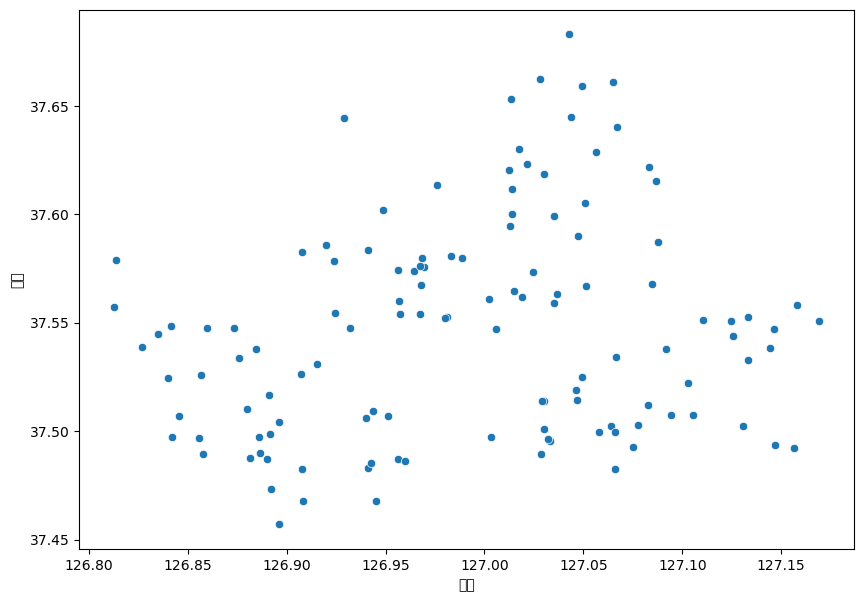

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x='경도',y= '위도')

## folium을 활용한 시각화

In [19]:
map = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=12)

for index, row in df.iterrows():
    folium.CircleMarker(location=[row['위도'], row['경도']], radius=5,
                  color='blue',
                  fill_color=True,
                  popup=row['새주소명']).add_to(map)
map